In [1]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from SkeletonOfBeam import SkeletonOfBeam
from SkeletonOfBeam import GeometryToolBox

In [2]:
mesh = trimesh.load_mesh("cantilever.stl")

In [3]:
class nBeams:
    mSob = None
    mesh = None 
    num = None
    
    nSobs = []
    
    alpha_xyPlane = []
    alpha_xzPlane = []
    
    def __init__(self, motherSOB, n):
        self.mSob = motherSOB
        self.mesh = motherSOB.mesh.copy()
        self.num = n
        
        self.nSobs = []
        
        xiRange = np.linspace(0, 1, n+1, True)
        for i in range(n):
            nVec = self.mSob.returnTangentVectorAtXi(xiRange[i])
            sp = self.mSob.returnSkeletonPointsInXiRange(xiRange[i], xiRange[i+1])
            sob = SkeletonOfBeam(self.mesh, nVec)
            sob.SkeletonPoints = sp
            
            self.nSobs.append(sob)
            
    def run(self):
        for i in range(self.num):
            self.nSobs[i].getNewCoordinate()
            self.nSobs[i].getProjections()
            self.nSobs[i].getSkeletonEqs()
            self.nSobs[i].getDerivativeSkeletonEqs()

            self.nSobs[i].getNewSkeletonPoints()
            self.nSobs[i].getNewIntersections()
            
    def getAlpha(self):
        for i in range(self.num):
            if i == 0:
                self.alpha_xyPlane = self.nSobs[i].alpha_xyPlane
                self.alpha_xzPlane = self.nSobs[i].alpha_xzPlane
            else:
                self.alpha_xyPlane = np.append(self.alpha_xyPlane, self.nSobs[i].alpha_xyPlane[-2:])
                self.alpha_xzPlane = np.append(self.alpha_xzPlane, self.nSobs[i].alpha_xzPlane[-2:])
        
        

In [19]:
sob = SkeletonOfBeam(mesh, [1, 0, 0])

In [21]:
sob.getScaleAlongSkeletonVec()
sob.getIntersectionsFromStep(step=1)
sob.getSkeletonPoints()

In [22]:
sob.getNewCoordinate()
sob.getProjections()
sob.getSkeletonEqs()
sob.getDerivativeSkeletonEqs()

sob.getNewSkeletonPoints()
sob.getNewIntersections()

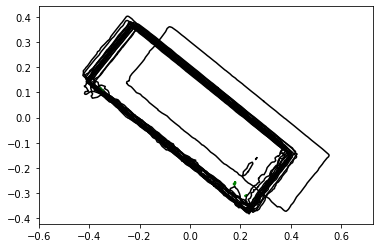

In [23]:
sob.showIntersections()

In [7]:
sobs = nBeams(sob, 5)

In [8]:
sobs.run()

In [9]:
sobs.getAlpha()

In [10]:
sobs.alpha_xyPlane

array([-2.03203436e-08,  2.70391825e-02,  2.47195260e-01,  3.91604858e-02,
        3.18007111e-01,  4.69406281e-02,  3.63090674e-01,  5.12508160e-02,
        3.84158874e-01,  5.23365624e-02,  3.82171843e-01,  5.03324732e-02])

In [11]:
sobs.alpha_xzPlane

array([-2.00425877e-08,  2.79531200e-02,  2.53960095e-01,  4.00741695e-02,
        3.28652815e-01,  4.83773240e-02,  3.77312460e-01,  5.31690261e-02,
        4.01011342e-01,  5.46090632e-02,  4.00366471e-01,  5.27862977e-02])

In [13]:
sob_0 = sobs.nSobs[0]

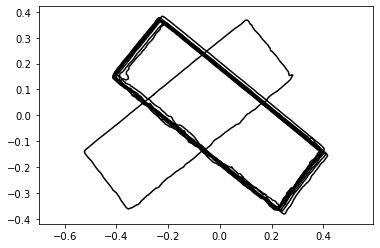

In [14]:
sob_0.showIntersections()

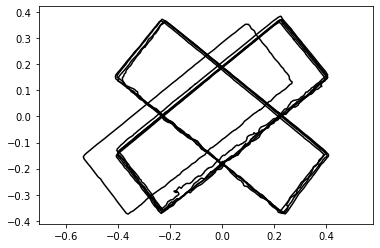

In [15]:
sobs.nSobs[1].showIntersections()

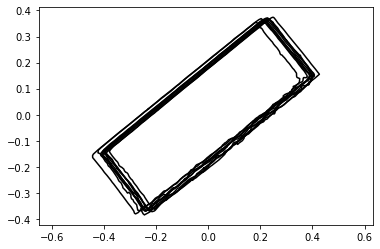

In [16]:
sobs.nSobs[2].showIntersections()

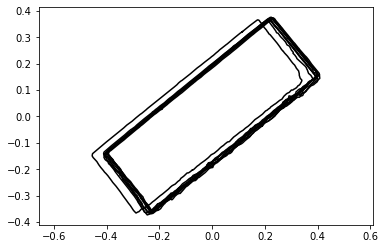

In [17]:
sobs.nSobs[3].showIntersections()

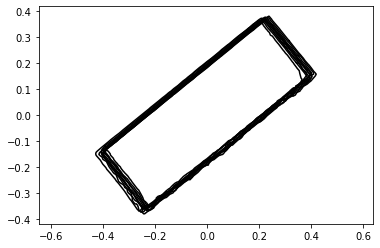

In [18]:
sobs.nSobs[4].showIntersections()

In [21]:
slice = mesh.section(plane_origin=mesh.centroid, 
                 plane_normal=np.array([1, 0, 0]))
slice_2D, to_3D = slice.to_planar()
slice_firstPart = slice_2D.split()[0] # 分割，并选取第一个部分（应该是最大的那个部分）

In [22]:
print(slice)

<trimesh.Path3D(vertices.shape=(358, 3), len(entities)=2)>


In [54]:
slice_firstPart.to_3D(to_3D).centroid

array([-0.91451625, -0.13691134, -5.44386294])

In [4]:
mesh.bounds

array([[-21.28422928,  -1.49518299,  -6.24997091],
       [ 18.52413559,   1.31816697,  -4.69799995]])

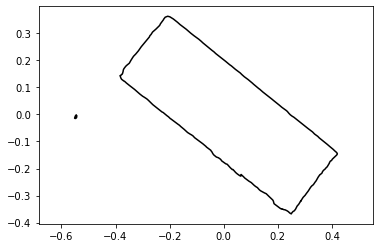

In [4]:
# get a single cross section of the mesh
slice = mesh.section(plane_origin=mesh.centroid, 
                     plane_normal=[1,0, 0])
slice_2D, to_3D = slice.to_planar()
slice_2D.show()

In [ ]:
slice_

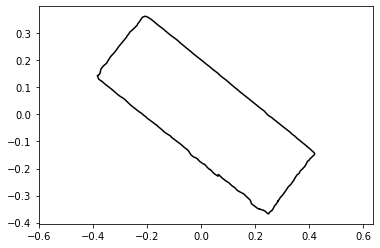

In [14]:
slices_splited = slice_2D.split()
sliceIndex = np.argmax([s.area for s in slices_splited])
slice_2D = slices_splited[sliceIndex]
slice_2D.show()

In [15]:
slice_2D.apply_obb()

array([[ 0.77499324, -0.63196952, -0.01554085],
       [ 0.63196952,  0.77499324, -0.00918349],
       [ 0.        ,  0.        ,  1.        ]])

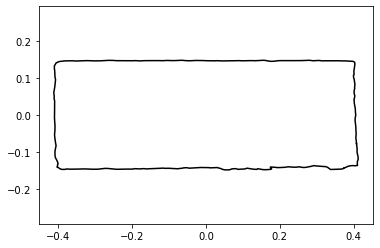

In [16]:
slice_2D.show()

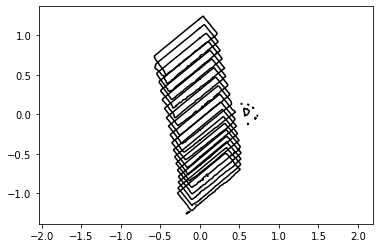

In [20]:
z_extents = mesh.bounds[:,0]
# slice every .125 model units (eg, inches)
z_levels  = np.arange(*z_extents, step=2)
sections = mesh.section_multiplane(plane_origin=mesh.centroid, 
                                   plane_normal=np.array([1, 0, 0]),
                                   heights=z_levels)

sections = [i for i in sections if i is not None]
combined = np.sum(sections)
combined.show()

In [20]:
import numpy as np


In [36]:
v1 = [1, 0, 0]
v2 = [0, 1, 0]

r = rotation_matrix(v1, v2)
r

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [37]:
np.dot(r, v1)

array([0., 1., 0.])

In [30]:
def projected_point(point, plane_origin, planeVec1, planeVec2):
    """
    已知平面内一原点以及两个正交向量，求已知点在该平面内的投影坐标（二维）
    """
    pVec = np.asarray(point) - np.asarray(plane_origin)
    xVec = np.asarray(planeVec1) / np.linalg.norm(planeVec1)
    yVec = np.asarray(planeVec2) / np.linalg.norm(planeVec2)
    s1 = np.dot(pVec, xVec)
    s2 = np.dot(pVec, yVec)
    
    return np.array([s1, s2])

In [29]:
p = [1, 1, 5]
o = [0, 0, 0]
x = [1, 1, 0]
y = [-1, 1, 0]
projected_point(p, o, x, y)

array([1.41421356, 0.        ])

In [19]:
np.dot(r, v1)

array([0., 1., 0.])

In [14]:
np.arccos(np.dot([0, 1, 0], [1, 0, 0]))

1.5707963267948966

In [15]:
np.pi/2

1.5707963267948966

In [16]:
np.linalg.norm([1, 0, 0])

1.0